<a href="https://colab.research.google.com/github/aysenuressiz/aysenuressiz/blob/main/bitirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drive'a Bağlanma

In [ ]:
# Google Drive'a bağlanır.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#dosya yoluna gider
import os

COLAB_PATH = "/content/gdrive/MyDrive"
os.chdir(COLAB_PATH)

# Dataset Ayıklama ve Sınıflardaki sayıları kontrol etme

In [ ]:
# Dataset klasörü kontrol edilir.
!ls data/

dataset2.zip		OriginalDataset      SameAugmented20SplitDataset
Original20SplitDataset	OriginalDataset.zip  SameAugmented30SplitDataset


In [ ]:
# Dataset ayıklanır.
!unzip data/OriginalDataset.zip -d ./data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/OriginalDataset/NonDemented/31 (100).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (11).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (12).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (13).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (14).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (15).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (16).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (17).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (18).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (19).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (2).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (20).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (21).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (22).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (23).jpg  
  inflating: ./data/Ori

In [ ]:
#Klasörlerdeki görüntülerin sayısı
import os

extract_path = "data/Original30SplitDataset/Train"  # Klasör yolunu kontrol et

# Desteklenen görüntü formatları
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')
folder_image_counts = {}

# Klasörün var olup olmadığını kontrol et
if os.path.exists(extract_path):
    # Her klasörde kaç görüntü var say
    for folder_name in os.listdir(extract_path):
        folder_path = os.path.join(extract_path, folder_name)
        if os.path.isdir(folder_path):  # Sadece klasörleri kontrol et
            image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
            folder_image_counts[folder_name] = image_count

    # Sonuçları yazdır
    for folder, count in folder_image_counts.items():
        print(f"{folder}: {count} görüntü")
else:
    print("HATA: Belirtilen klasör bulunamadı! Lütfen yolu kontrol et.")


ModerateDemented: 44 görüntü
NonDemented: 2240 görüntü
VeryMildDemented: 1568 görüntü
MildDemented: 627 görüntü


#orjinal dataseti eğitim ve test olarak ayırma

In [ ]:
#Kütüphaneler
import os
import shutil
from sklearn.model_selection import train_test_split

%20 Test %80 Eğitim

In [ ]:
# Orijinal veri setinin bulunduğu klasör
dataset_path = "data/OriginalDataset"
split_dataset_path = "data/Original20SplitDataset"  # Yeni klasör yapısı
train_path = os.path.join(split_dataset_path, "Train")  # Eğitim verisi klasörü
test_path = os.path.join(split_dataset_path, "Test")    # Test verisi klasörü

# Klasörleri oluştur
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Sınıflar (class folders)
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

In [ ]:
# Eğitim ve test verilerini ayır
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # Tüm resimlerin yolu - diğer olası resim uzantılarını da ekle
    all_images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tiff', '.gif'))]

    # Bölmeden önce all_images'ın boş olup olmadığını kontrol et
    if not all_images:
        print(f"Uyarı: {class_path} içinde resim bulunamadı. Bu klasör atlanıyor.")
        continue  # Bir sonraki class_folder'a geç

    # Eğitim ve test verilerini %80 ve %20 oranında ayır
    train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Yeni klasörler oluştur (her sınıf için eğitim ve test alt klasörleri)
    class_train_path = os.path.join(train_path, class_folder)
    class_test_path = os.path.join(test_path, class_folder)

    os.makedirs(class_train_path, exist_ok=True)
    os.makedirs(class_test_path, exist_ok=True)

    # Eğitim verilerini kopyala
    for img_path in train_images:
        shutil.copy(img_path, class_train_path)

    # Test verilerini kopyala
    for img_path in test_images:
        shutil.copy(img_path, class_test_path)

print("Veri seti başarıyla eğitim ve test olarak bölündü.")

Veri seti başarıyla eğitim ve test olarak bölündü.


%30 Test %70 Eğitim

In [ ]:
# Orijinal veri setinin bulunduğu klasör
dataset_path = "data/OriginalDataset"
split_dataset_path = "data/Original30SplitDataset"  # Yeni klasör yapısı
train_path = os.path.join(split_dataset_path, "Train")  # Eğitim verisi klasörü
test_path = os.path.join(split_dataset_path, "Test")    # Test verisi klasörü

# Klasörleri oluştur
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Sınıflar (class folders)
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

In [ ]:
# Eğitim ve test verilerini ayır
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # Tüm resimlerin yolu - diğer olası resim uzantılarını da ekle
    all_images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tiff', '.gif'))]

    # Bölmeden önce all_images'ın boş olup olmadığını kontrol et
    if not all_images:
        print(f"Uyarı: {class_path} içinde resim bulunamadı. Bu klasör atlanıyor.")
        continue  # Bir sonraki class_folder'a geç

    # Eğitim ve test verilerini %70 ve %30 oranında ayır
    train_images, test_images = train_test_split(all_images, test_size=0.3, random_state=42)

    # Yeni klasörler oluştur (her sınıf için eğitim ve test alt klasörleri)
    class_train_path = os.path.join(train_path, class_folder)
    class_test_path = os.path.join(test_path, class_folder)

    os.makedirs(class_train_path, exist_ok=True)
    os.makedirs(class_test_path, exist_ok=True)

    # Eğitim verilerini kopyala
    for img_path in train_images:
        shutil.copy(img_path, class_train_path)

    # Test verilerini kopyala
    for img_path in test_images:
        shutil.copy(img_path, class_test_path)

print("Veri seti başarıyla eğitim ve test olarak bölündü.")

Veri seti başarıyla eğitim ve test olarak bölündü.


#Veri Artırma

## Orantısal veri artırma (%50)

In [ ]:
!pip install tensorflow

In [ ]:
#kütüphaneleri tanımla
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tqdm import tqdm

In [ ]:
# Klasör yolları
dataset_path = "data/Original20SplitDataset/Train"  # Orijinal train veri klasörü
testi_path = "data/Original20SplitDataset/Test"  # Orijinal test veri klasörü
augmented_path = "data/50Augmented20SplitDataset"  # Artırılmış verinin kaydedileceği ana klasör
train_path = os.path.join(augmented_path, "Train")  # Artırılmış train klasörü
test_path = os.path.join(augmented_path, "Test")  # Test verisi klasörü (sadece kopyalanacak)

# Klasörleri oluştur
os.makedirs(augmented_path, exist_ok=True)
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)


In [ ]:
# Veri artırma kuralları
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
# Test verisini `Test` klasörüne kopyala
for class_folder in os.listdir(testi_path):
    class_path = os.path.join(testi_path, class_folder)

    if not os.path.isdir(class_path):
        continue

    # Test klasörüne orijinal veriyi kopyala
    save_test_path = os.path.join(test_path, class_folder)
    os.makedirs(save_test_path, exist_ok=True)  # Test klasörünü oluştur

    for file in os.listdir(class_path):
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Sadece resim dosyalarını kopyala
            shutil.copy(os.path.join(class_path, file), os.path.join(save_test_path, file))

In [ ]:
# Eğitim klasörlerinde her bir sınıfı (class_folder) işleyelim
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    # Klasör değilse geç
    if not os.path.isdir(class_path):
        continue

    # Artırılmış verilerin kaydedileceği klasör
    save_path = os.path.join(train_path, class_folder)
    os.makedirs(save_path, exist_ok=True)  # Klasör yoksa oluştur

    # Orijinal verileri artırılmış klasöre kopyala
    for file in os.listdir(class_path):
        shutil.copy(os.path.join(class_path, file), os.path.join(save_path, file))

    # Görsellerin yolu
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

    # %50 oranında artırma (örneğin her sınıftaki mevcut görüntülerin yarısı artırılacak)
    num_augmented = len(images) // 2
    print(f"{class_folder}: {len(images)} görüntü -> {num_augmented} yeni görüntü eklenecek")

    # Veri artırma işlemi
    for img_path in tqdm(images[:num_augmented]):  # Sadece %50’lik kısmı artır
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # 4D array formatına getir

        # Artırılmış görüntüler oluştur
        i = 0
        for batch in datagen.flow(img_array, batch_size=1):
            new_img = array_to_img(batch[0])
            new_img.save(os.path.join(save_path, f"aug_{i}_{os.path.basename(img_path)}"))
            i += 1
            if i >= 1:  # Her resim için 1 tane yeni oluştur
                break

ModerateDemented: 51 görüntü -> 25 yeni görüntü eklenecek


100%|██████████| 25/25 [00:00<00:00, 63.90it/s]


NonDemented: 2560 görüntü -> 1280 yeni görüntü eklenecek


100%|██████████| 1280/1280 [00:19<00:00, 67.15it/s]


VeryMildDemented: 1792 görüntü -> 896 yeni görüntü eklenecek


100%|██████████| 896/896 [00:13<00:00, 65.57it/s]


MildDemented: 716 görüntü -> 358 yeni görüntü eklenecek


100%|██████████| 358/358 [00:05<00:00, 68.10it/s]


In [ ]:
#Klasörlerdeki görüntülerin sayısı
import os

extract_path = "data/SameAugmented30SplitDataset/Train"  # Klasör yolunu kontrol et

# Desteklenen görüntü formatları
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')
folder_image_counts = {}

# Klasörün var olup olmadığını kontrol et
if os.path.exists(extract_path):
    # Her klasörde kaç görüntü var say
    for folder_name in os.listdir(extract_path):
        folder_path = os.path.join(extract_path, folder_name)
        if os.path.isdir(folder_path):  # Sadece klasörleri kontrol et
            image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
            folder_image_counts[folder_name] = image_count

    # Sonuçları yazdır
    for folder, count in folder_image_counts.items():
        print(f"{folder}: {count} görüntü")
else:
    print("HATA: Belirtilen klasör bulunamadı! Lütfen yolu kontrol et.")


MildDemented: 2931 görüntü
ModerateDemented: 3180 görüntü
NonDemented: 2240 görüntü
VeryMildDemented: 2528 görüntü


## Sınıf sayılarını eşitleyerek veri artırma





In [ ]:
pip install tensorflow pillow numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math


In [ ]:
# Giriş klasörü
original_data_dir = 'data/OriginalDataset'
train_dir = 'data/SameAugmented30SplitDataset/Train'
test_dir = 'data/SameAugmented30SplitDataset/Test'

In [ ]:
# Her sınıf için hedef toplam (train + test)
TARGET_TOTAL = 3200
TEST_RATIO = 0.3

In [ ]:
# Veri artırma için jeneratör
augmenter = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Klasörleri temizle ve yeniden oluştur
def prepare_dirs():
    for base in [train_dir, test_dir]:
        if os.path.exists(base):
            shutil.rmtree(base)
        os.makedirs(base)

        for class_name in os.listdir(original_data_dir):
            os.makedirs(os.path.join(base, class_name), exist_ok=True)

In [ ]:
# Veriyi %80 train, %20 test olarak ayır
def split_data():
    for class_name in os.listdir(original_data_dir):
        class_path = os.path.join(original_data_dir, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)

        total = len(images)
        test_count =math.ceil(total * TEST_RATIO)
        test_images = images[:test_count]
        train_images = images[test_count:]

        # Teste kopyala
        for img_name in test_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(test_dir, class_name, img_name)
            shutil.copy(src, dst)

        # Traine kopyala
        for img_name in train_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(train_dir, class_name, img_name)
            shutil.copy(src, dst)

In [ ]:
# Veri artırma
def augment_class(class_path, target_count):
    images = os.listdir(class_path)
    current_count = len(images)

    if current_count >= target_count:
        return

    needed = target_count - current_count
    print(f"{os.path.basename(class_path)} sınıfında {needed} veri artırılacak.")

    i = 0
    while i < needed:
        img_name = random.choice(images)
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224, 224))  # Boyutlar ihtiyaca göre değiştirilebilir
        x = augmenter.random_transform(np.array(img))
        x = Image.fromarray(x.astype('uint8'))

        new_name = f"aug_{i}_{img_name}"
        x.save(os.path.join(class_path, new_name))
        i += 1

In [ ]:
# Ana akış
def main():
    prepare_dirs()
    split_data()

    for class_name in os.listdir(train_dir):
        test_count = len(os.listdir(os.path.join(test_dir, class_name)))
        target_train = TARGET_TOTAL - test_count
        augment_class(os.path.join(train_dir, class_name), target_train)

if __name__ == "__main__":
    import numpy as np
    main()


MildDemented sınıfında 2304 veri artırılacak.
ModerateDemented sınıfında 3136 veri artırılacak.
VeryMildDemented sınıfında 960 veri artırılacak.


In [ ]:
#Klasörlerdeki görüntülerin sayısı
import os

extract_path = "data/SameAugmented30SplitDataset/Train"  # Klasör yolunu kontrol et

# Desteklenen görüntü formatları
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')
folder_image_counts = {}

# Klasörün var olup olmadığını kontrol et
if os.path.exists(extract_path):
    # Her klasörde kaç görüntü var say
    for folder_name in os.listdir(extract_path):
        folder_path = os.path.join(extract_path, folder_name)
        if os.path.isdir(folder_path):  # Sadece klasörleri kontrol et
            image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
            folder_image_counts[folder_name] = image_count

    # Sonuçları yazdır
    for folder, count in folder_image_counts.items():
        print(f"{folder}: {count} görüntü")
else:
    print("HATA: Belirtilen klasör bulunamadı! Lütfen yolu kontrol et.")


MildDemented: 2931 görüntü
ModerateDemented: 3180 görüntü
NonDemented: 2240 görüntü
VeryMildDemented: 2528 görüntü


## Veri artırma sonucu sınıf dağılımları

###**%80 Train, %20 Test**
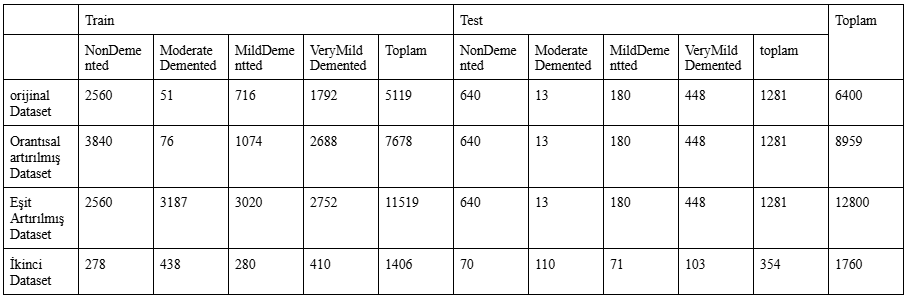

###**%70 Train, %30 Test**
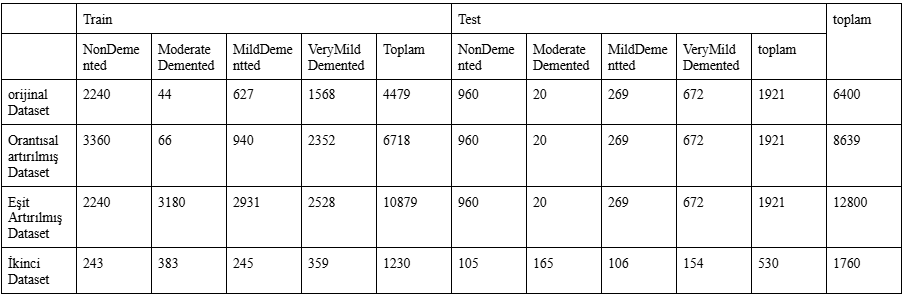

# Model Eğitimleri

## VGG-16

VGG-16 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarının başarımları

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad


In [ ]:
# Veri yolu ve görsel boyutu
dataset_path = r"data/dataset220SplitDataset"
img_size = 224

# Sınıf etiketleri (Kategori -> Label ID)
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata oluştu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eğitim ve test verisini yükleme
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


In [ ]:
# VGG16 Modeli (Transfer Öğrenme)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model yapılandırması
def build_model(optimizer, dropout_rate=0.3):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Eğitim ve optimizasyon ayarları
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}

# Model özetini göster
base_model.summary()

# Sonuçları saklamak için boş bir sözlük
results = {}

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\n🔄 {optimizer_name} Optimizer ile Model Eğitimi Başlıyor...\n")
    model = build_model(optimizer, dropout_rate=0.3)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    # Model tahminleri
    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    # Model değerlendirme metrikleri
    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    # Sınıf etiketlerini doğrulama
    unique_labels = sorted(set(y_true))
    valid_label_names = [k for k, v in label_map.items() if v in unique_labels]

    # Classification Report
    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True, digits=4)

    # Sonuçları kaydetme
    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    # Sonuçları ekrana yazdırma
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(f"✅ F1 Score (Weighted Avg): {f1:.4f}")
    print(f"✅ Recall Score (Weighted Avg): {recall:.4f}")
    print(f"✅ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")


    # Confusion Matrix Görselleştirme
    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

# Loss ve Accuracy Grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{optimizer_name} - Loss Grafiği')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{optimizer_name} - Accuracy Grafiği')
    plt.legend()
    plt.show()

In [ ]:
for optimizer_name, result in results.items():
    print(f"\n{optimizer_name} Optimizer - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score (Weighted Avg): {result['f1_score']:.4f}")
    print(f"Recall Score (Weighted Avg): {result['recall_score']:.4f}")

## VGG-19

VGG-19 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarının başarımları

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad


In [ ]:
# Veri yolu ve görsel boyutu
dataset_path = r"data/SameAugmented20SplitDataset"
img_size = 224

# Sınıf etiketleri (Kategori -> Label ID)
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata oluştu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eğitim ve test verisini yükleme
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


In [ ]:
# VGG19 Modeli (Transfer Öğrenme)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model yapılandırması
def build_model(optimizer, dropout_rate=0.5):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Eğitim ve optimizasyon ayarları
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}

# Model özetini göster
base_model.summary()

# Sonuçları saklamak için boş bir sözlük
results = {}

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)


🔄 Adam Optimizer ile Model Eğitimi Başlıyor...

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.5741 - loss: 1.0046 - val_accuracy: 0.6276 - val_loss: 0.9552 - learning_rate: 0.0010
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7653 - loss: 0.5344 - val_accuracy: 0.7237 - val_loss: 0.6205 - learning_rate: 0.0010
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8110 - loss: 0.4435 - val_accuracy: 0.7775 - val_loss: 0.5536 - learning_rate: 0.0010
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8382 - loss: 0.3876 - val_accuracy: 0.8002 - val_loss: 0.4831 - learning_rate: 0.0010
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8538 - loss: 0.3417 - val_accuracy: 0.8212 - val_loss: 0.4297 - learning_rate: 0.0010
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8703 - loss: 0.3171 - val_accuracy: 0.8501 - val_loss: 0.4002 - learning_rate: 0.0010
Epoch 7/20
360/360 ━━━━━━━━━━━━━

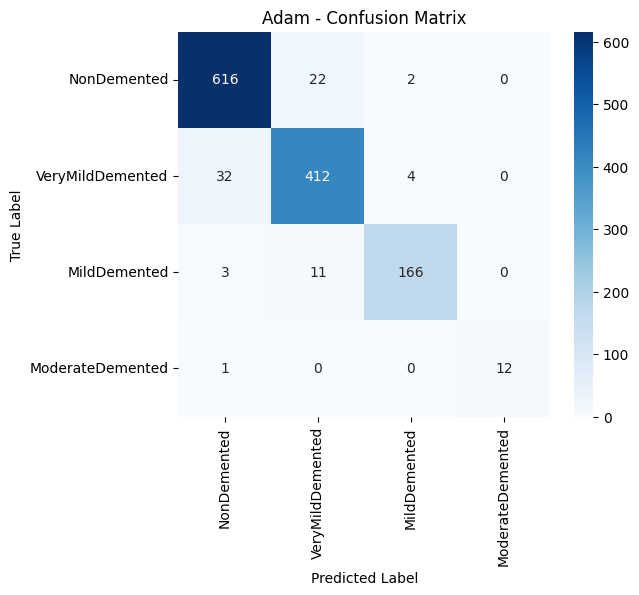

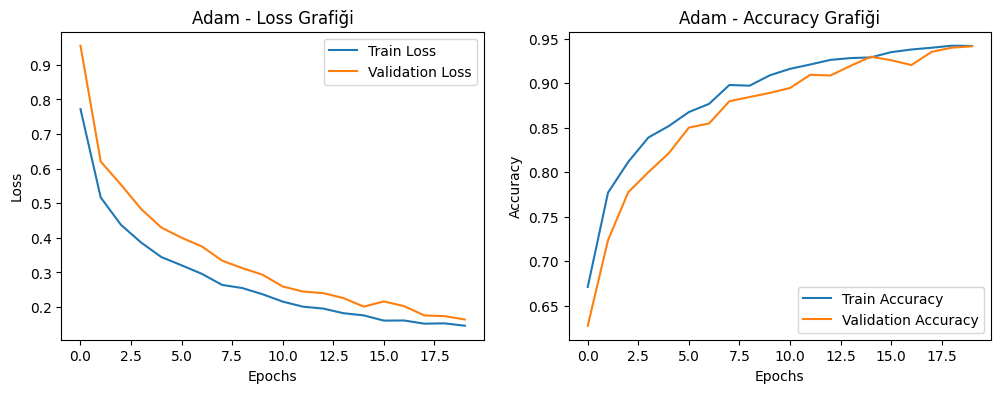


🔄 SGD Optimizer ile Model Eğitimi Başlıyor...

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5889 - loss: 0.9566 - val_accuracy: 0.6034 - val_loss: 0.9541 - learning_rate: 0.0100
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7582 - loss: 0.5418 - val_accuracy: 0.7283 - val_loss: 0.6543 - learning_rate: 0.0100
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7870 - loss: 0.4883 - val_accuracy: 0.7346 - val_loss: 0.6039 - learning_rate: 0.0100
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8165 - loss: 0.4294 - val_accuracy: 0.7845 - val_loss: 0.5012 - learning_rate: 0.0100
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8403 - loss: 0.3779 - val_accuracy: 0.8142 - val_loss: 0.4607 - learning_rate: 0.0100
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8541 - loss: 0.3556 - val_accuracy: 0.8290 - val_loss: 0.4215 - learning_rate: 0.0100
Epoch 7/20
360/360 ━━━━━━━━━━━━━━

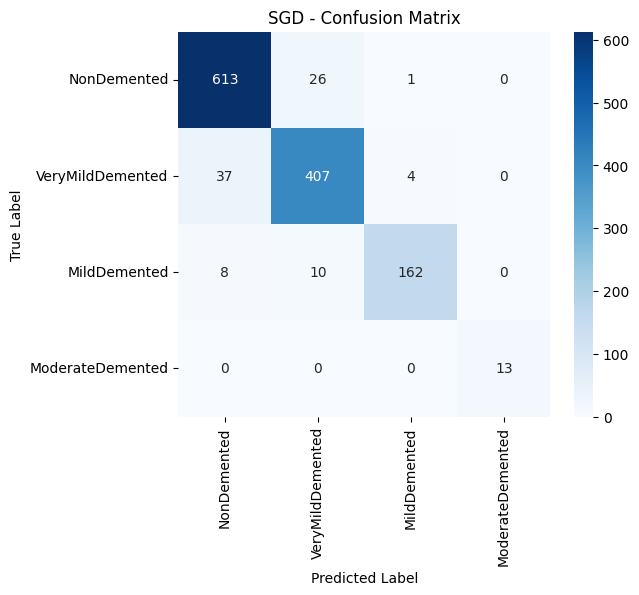

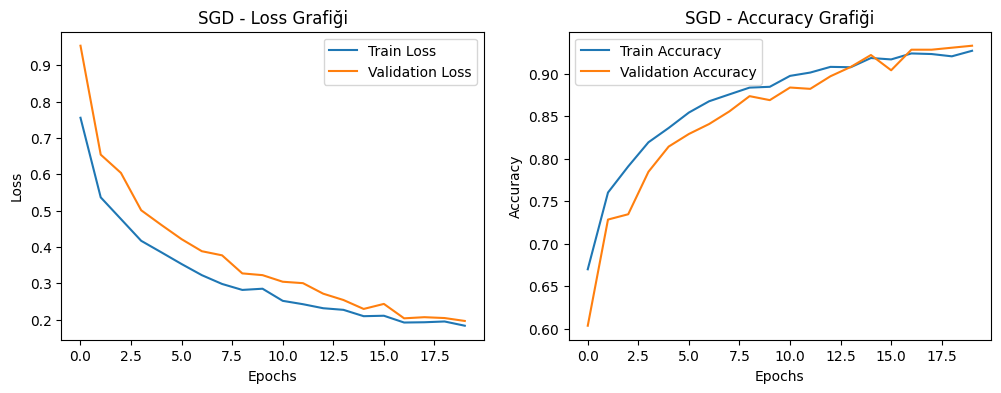


🔄 Nadam Optimizer ile Model Eğitimi Başlıyor...

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.6206 - loss: 0.9117 - val_accuracy: 0.6464 - val_loss: 0.9506 - learning_rate: 0.0020
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7797 - loss: 0.5007 - val_accuracy: 0.7510 - val_loss: 0.5817 - learning_rate: 0.0020
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8206 - loss: 0.4186 - val_accuracy: 0.7783 - val_loss: 0.5145 - learning_rate: 0.0020
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8392 - loss: 0.3756 - val_accuracy: 0.8298 - val_loss: 0.4291 - learning_rate: 0.0020
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8586 - loss: 0.3332 - val_accuracy: 0.8275 - val_loss: 0.4009 - learning_rate: 0.0020
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8788 - loss: 0.2981 - val_accuracy: 0.8704 - val_loss: 0.3553 - learning_rate: 0.0020
Epoch 7/20
360/360 ━━━━━━━━━━━━

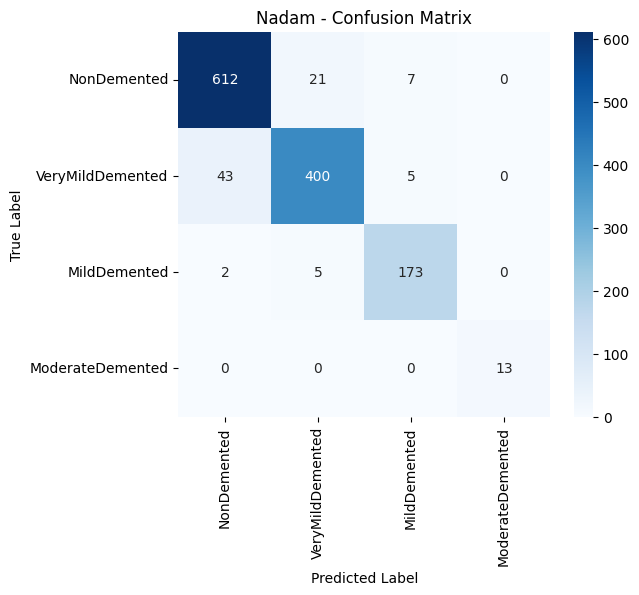

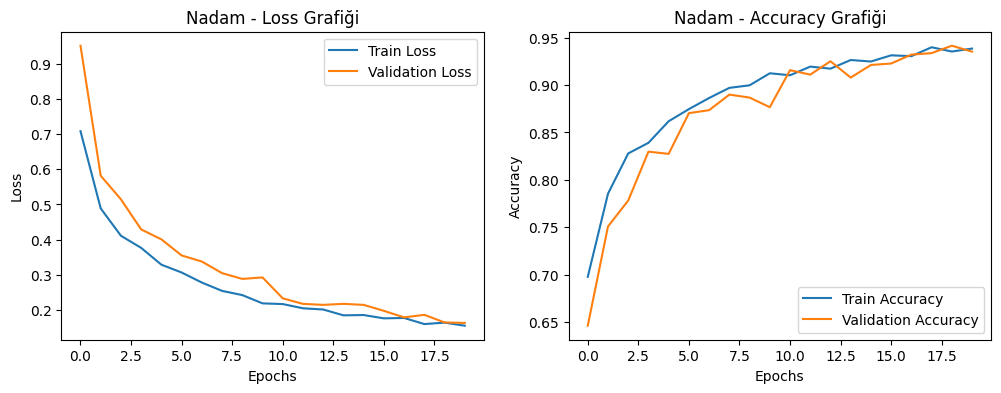


🔄 RMSprop Optimizer ile Model Eğitimi Başlıyor...

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5985 - loss: 0.9517 - val_accuracy: 0.6269 - val_loss: 0.9102 - learning_rate: 0.0010
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7751 - loss: 0.5316 - val_accuracy: 0.7299 - val_loss: 0.6253 - learning_rate: 0.0010
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8117 - loss: 0.4371 - val_accuracy: 0.7650 - val_loss: 0.5442 - learning_rate: 0.0010
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8397 - loss: 0.3928 - val_accuracy: 0.8072 - val_loss: 0.4747 - learning_rate: 0.0010
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8632 - loss: 0.3332 - val_accuracy: 0.8048 - val_loss: 0.4499 - learning_rate: 0.0010
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8759 - loss: 0.2984 - val_accuracy: 0.8525 - val_loss: 0.3903 - learning_rate: 0.0010
Epoch 7/20
360/360 ━━━━━━━━━━

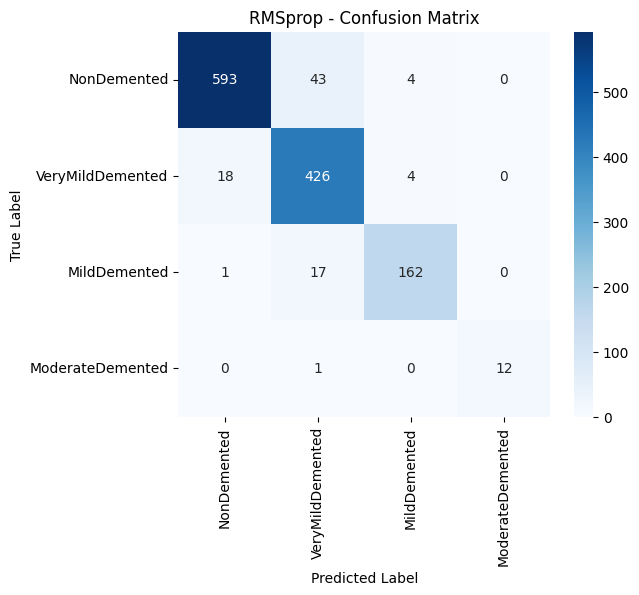

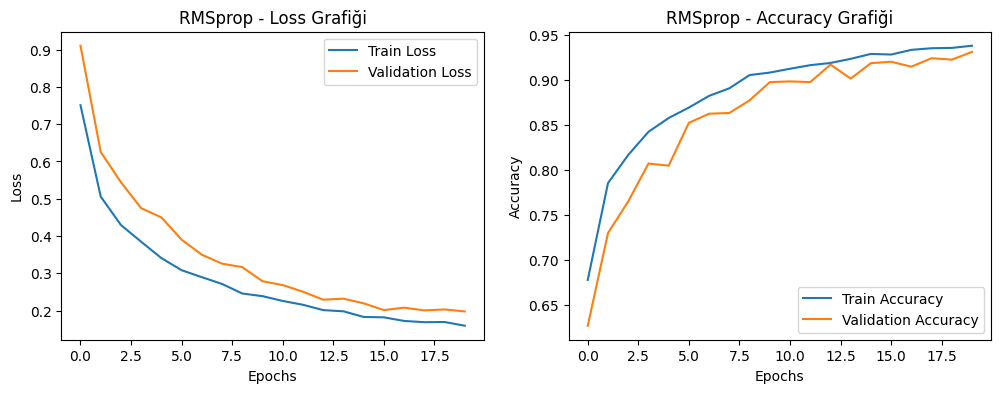


🔄 Adadelta Optimizer ile Model Eğitimi Başlıyor...

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5900 - loss: 0.9471 - val_accuracy: 0.6245 - val_loss: 0.9592 - learning_rate: 1.0000
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7615 - loss: 0.5451 - val_accuracy: 0.7158 - val_loss: 0.6534 - learning_rate: 1.0000
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8138 - loss: 0.4474 - val_accuracy: 0.7549 - val_loss: 0.5633 - learning_rate: 1.0000
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8309 - loss: 0.4002 - val_accuracy: 0.7650 - val_loss: 0.5243 - learning_rate: 1.0000
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8550 - loss: 0.3544 - val_accuracy: 0.8126 - val_loss: 0.4525 - learning_rate: 1.0000
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8763 - loss: 0.3140 - val_accuracy: 0.8454 - val_loss: 0.3988 - learning_rate: 1.0000
Epoch 7/20
360/360 ━━━━━━━━━

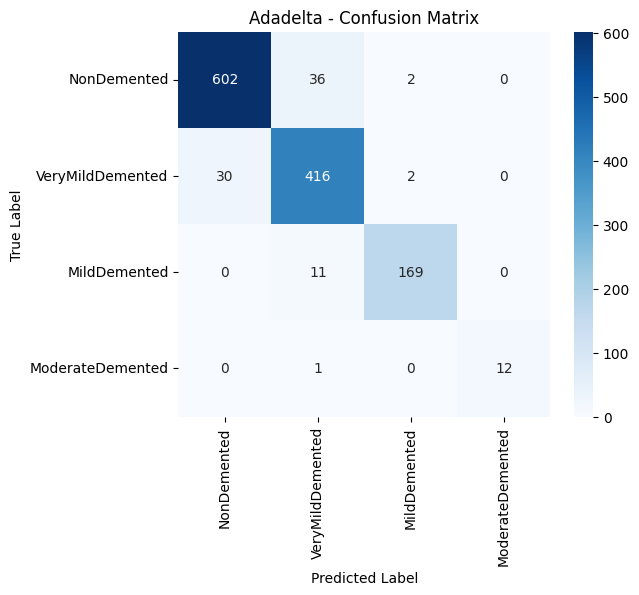

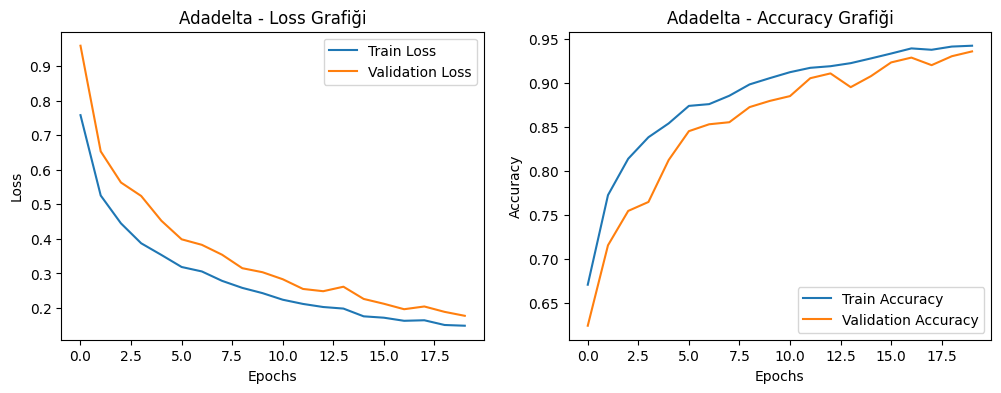


🔄 Adagrad Optimizer ile Model Eğitimi Başlıyor...

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5221 - loss: 1.0979 - val_accuracy: 0.5816 - val_loss: 1.0252 - learning_rate: 0.0100
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7088 - loss: 0.6772 - val_accuracy: 0.6604 - val_loss: 0.7498 - learning_rate: 0.0100
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7470 - loss: 0.5849 - val_accuracy: 0.6776 - val_loss: 0.6989 - learning_rate: 0.0100
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7671 - loss: 0.5430 - val_accuracy: 0.6956 - val_loss: 0.6689 - learning_rate: 0.0100
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7879 - loss: 0.5037 - val_accuracy: 0.7119 - val_loss: 0.6456 - learning_rate: 0.0100
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7991 - loss: 0.4930 - val_accuracy: 0.7268 - val_loss: 0.6215 - learning_rate: 0.0100
Epoch 7/20
360/360 ━━━━━━━━━━

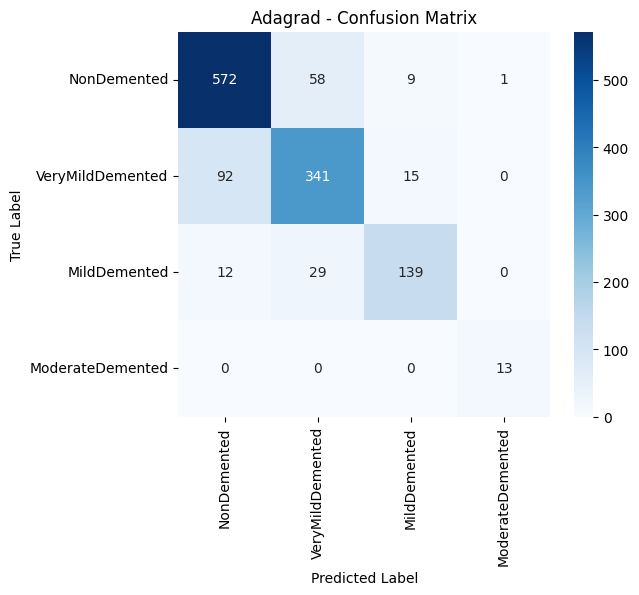

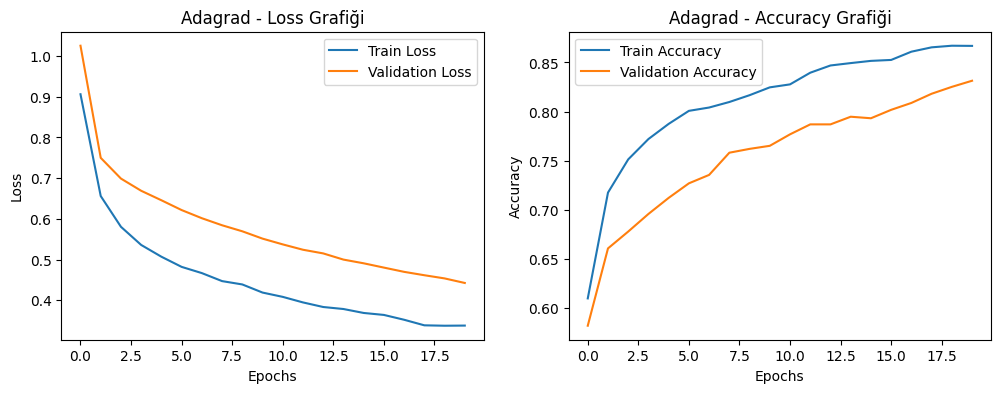

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\n🔄 {optimizer_name} Optimizer ile Model Eğitimi Başlıyor...\n")
    model = build_model(optimizer, dropout_rate=0.5)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    # Model tahminleri
    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    # Model değerlendirme metrikleri
    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    # Sınıf etiketlerini doğrulama
    unique_labels = sorted(set(y_true))
    valid_label_names = [k for k, v in label_map.items() if v in unique_labels]

    # Classification Report
    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True, digits=4)

    # Sonuçları kaydetme
    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    # Sonuçları ekrana yazdırma
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(f"✅ F1 Score (Weighted Avg): {f1:.4f}")
    print(f"✅ Recall Score (Weighted Avg): {recall:.4f}")
    print(f"✅ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")


    # Confusion Matrix Görselleştirme
    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

# Loss ve Accuracy Grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{optimizer_name} - Loss Grafiği')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{optimizer_name} - Accuracy Grafiği')
    plt.legend()
    plt.show()

In [ ]:
for optimizer_name, result in results.items():
    print(f"\n{optimizer_name} Optimizer - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score (Weighted Avg): {result['f1_score']:.4f}")
    print(f"Recall Score (Weighted Avg): {result['recall_score']:.4f}")


Adam Optimizer - Final Results
Test Accuracy: 0.9415
F1 Score (Weighted Avg): 0.9414
Recall Score (Weighted Avg): 0.9415

SGD Optimizer - Final Results
Test Accuracy: 0.9329
F1 Score (Weighted Avg): 0.9327
Recall Score (Weighted Avg): 0.9329

Nadam Optimizer - Final Results
Test Accuracy: 0.9352
F1 Score (Weighted Avg): 0.9350
Recall Score (Weighted Avg): 0.9352

RMSprop Optimizer - Final Results
Test Accuracy: 0.9313
F1 Score (Weighted Avg): 0.9318
Recall Score (Weighted Avg): 0.9313

Adadelta Optimizer - Final Results
Test Accuracy: 0.9360
F1 Score (Weighted Avg): 0.9362
Recall Score (Weighted Avg): 0.9360

Adagrad Optimizer - Final Results
Test Accuracy: 0.8314
F1 Score (Weighted Avg): 0.8302
Recall Score (Weighted Avg): 0.8314


## Resnet50

Resnet50 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarının başarımları

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix


In [ ]:
# Veri yolu ve boyutlar
dataset_path = r"data/Original20SplitDataset"
img_size = 224

# Etiket haritası
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata oluştu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eğitim ve test verisi
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

In [ ]:
# ResNet50 modeli
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model oluşturma
def build_model(optimizer, dropout_rate=0.5):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Optimizasyonlar
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}
# Model özetini göster
base_model.summary()

results = {}

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


🔁 Adam ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.4972 - loss: 1.1140 - val_accuracy: 0.4996 - val_loss: 1.0283 - learning_rate: 0.0010
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.5929 - loss: 0.8756 - val_accuracy: 0.5699 - val_loss: 0.9685 - learning_rate: 0.0010
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.6192 - loss: 0.8304 - val_accuracy: 0.6019 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.6434 - loss: 0.7835 - val_accuracy: 0.7034 - val_loss: 0.7245 - learning_rate: 0.0010
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.6619 - loss: 0.7489 - val_accuracy: 0.7237 - val_loss: 0.6646 - learning_rate: 0.0010
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.6982 - loss: 0.6900 - val_accuracy: 0.7510 - val_loss: 0.6127 - learning_rate: 0.0010
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/st

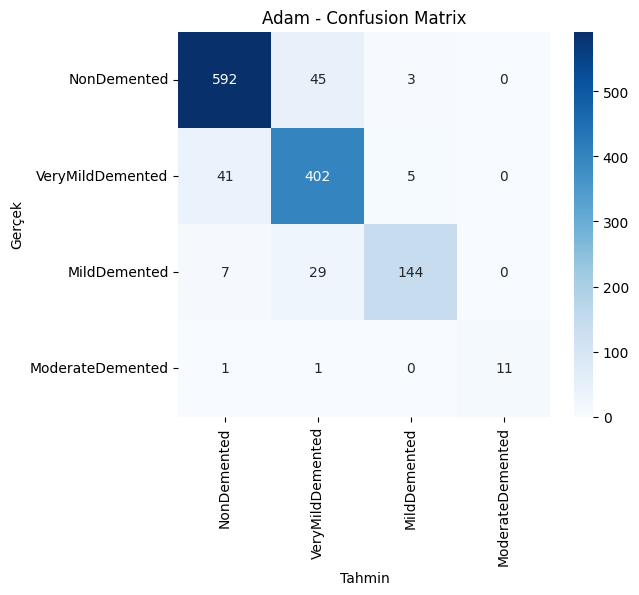

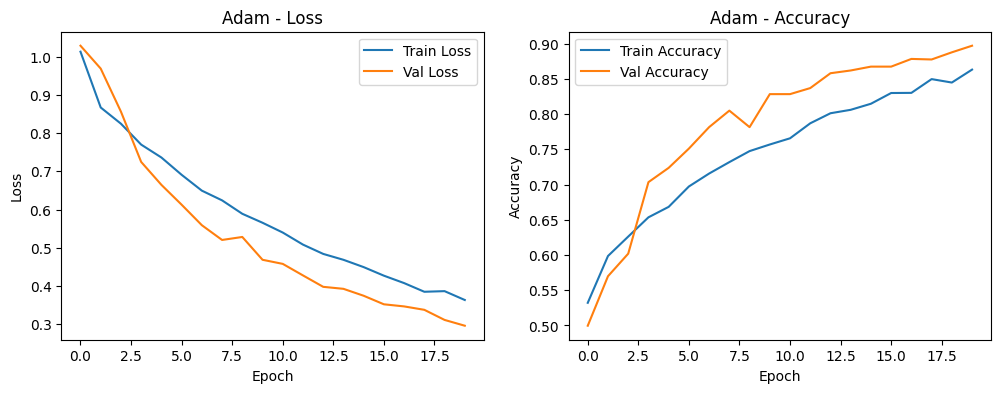


🔁 SGD ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.4839 - loss: 1.1279 - val_accuracy: 0.4996 - val_loss: 1.1092 - learning_rate: 0.0100
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.5770 - loss: 0.8981 - val_accuracy: 0.5027 - val_loss: 0.9418 - learning_rate: 0.0100
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.6069 - loss: 0.8432 - val_accuracy: 0.6183 - val_loss: 0.8373 - learning_rate: 0.0100
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.6220 - loss: 0.8218 - val_accuracy: 0.6745 - val_loss: 0.7643 - learning_rate: 0.0100
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.6242 - loss: 0.8057 - val_accuracy: 0.7182 - val_loss: 0.6940 - learning_rate: 0.0100
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.6732 - loss: 0.7344 - val_accuracy: 0.7143 - val_loss: 0.6743 - learning_rate: 0.0100
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/ste

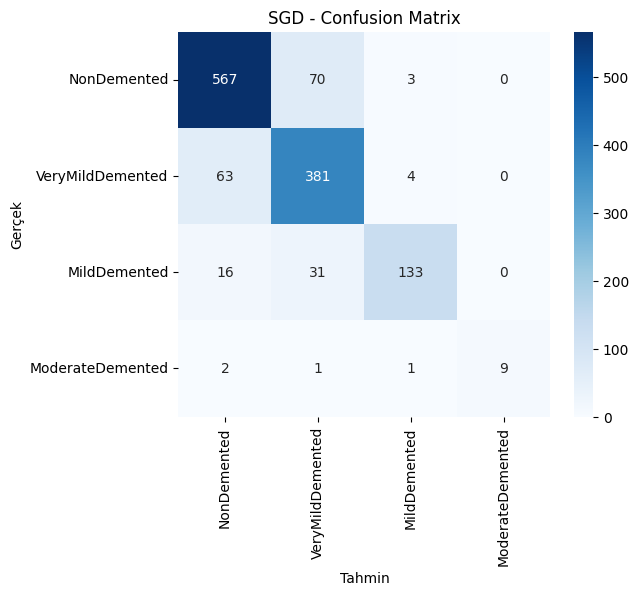

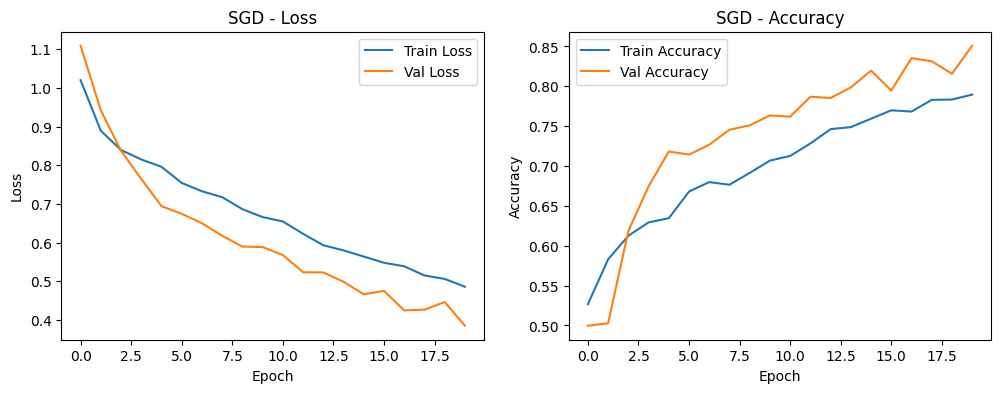


🔁 Nadam ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.5181 - loss: 1.0668 - val_accuracy: 0.5191 - val_loss: 1.0182 - learning_rate: 0.0020
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.5982 - loss: 0.8753 - val_accuracy: 0.5160 - val_loss: 0.9683 - learning_rate: 0.0020
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.6247 - loss: 0.8124 - val_accuracy: 0.6347 - val_loss: 0.8422 - learning_rate: 0.0020
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.6516 - loss: 0.7738 - val_accuracy: 0.7096 - val_loss: 0.7136 - learning_rate: 0.0020
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.6653 - loss: 0.7319 - val_accuracy: 0.7151 - val_loss: 0.6437 - learning_rate: 0.0020
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.6806 - loss: 0.6984 - val_accuracy: 0.7705 - val_loss: 0.5753 - learning_rate: 0.0020
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/s

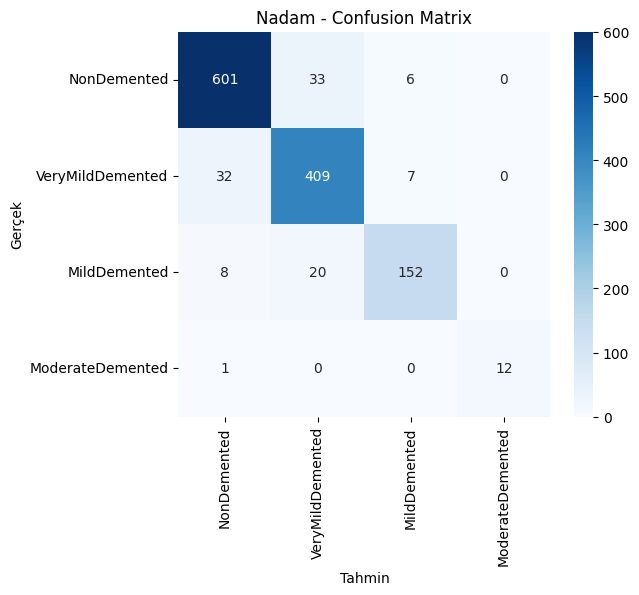

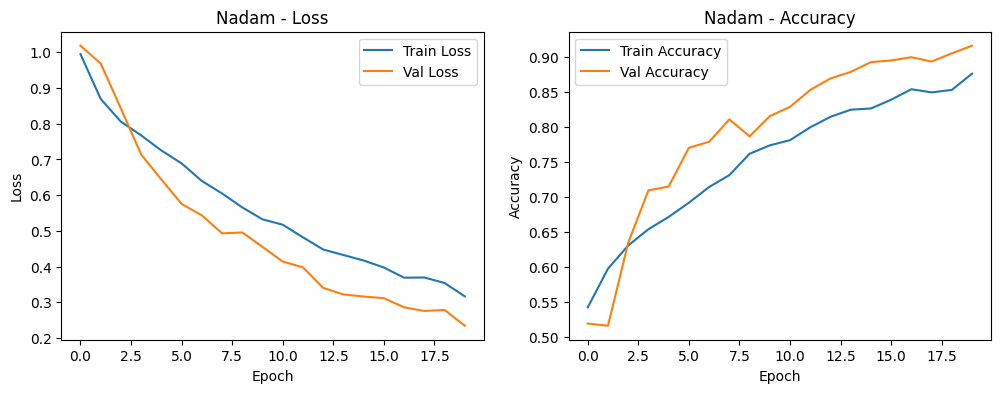


🔁 RMSprop ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.5091 - loss: 1.0866 - val_accuracy: 0.5027 - val_loss: 0.9930 - learning_rate: 0.0010
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.5837 - loss: 0.8880 - val_accuracy: 0.5550 - val_loss: 0.9911 - learning_rate: 0.0010
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.6189 - loss: 0.8278 - val_accuracy: 0.6495 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.6403 - loss: 0.7887 - val_accuracy: 0.6916 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.6684 - loss: 0.7435 - val_accuracy: 0.7330 - val_loss: 0.6644 - learning_rate: 0.0010
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.6887 - loss: 0.7106 - val_accuracy: 0.7611 - val_loss: 0.6062 - learning_rate: 0.0010
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 310s 2s

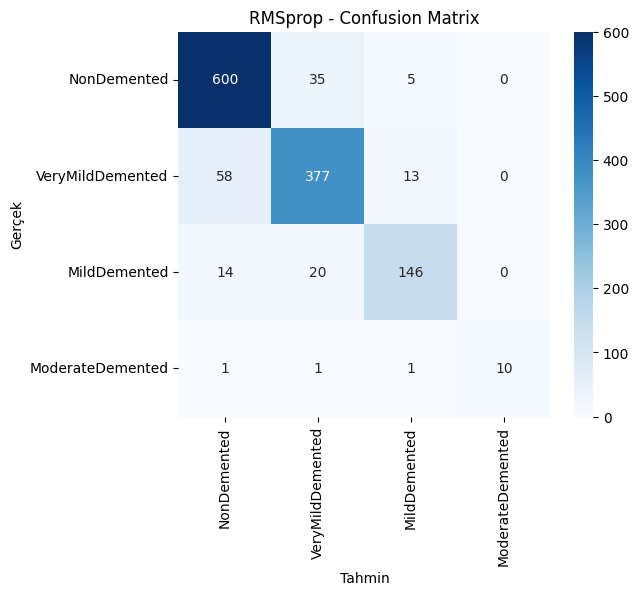

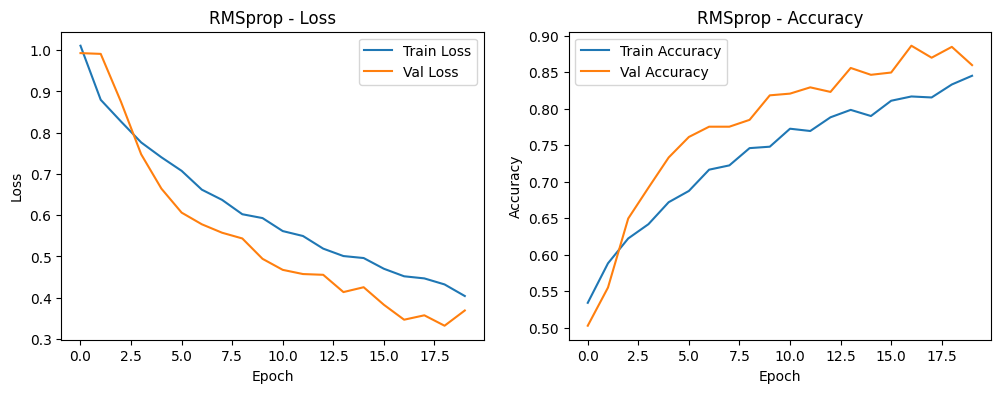


🔁 Adadelta ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.5174 - loss: 1.0686 - val_accuracy: 0.4996 - val_loss: 1.0152 - learning_rate: 1.0000
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.5995 - loss: 0.8650 - val_accuracy: 0.5152 - val_loss: 0.9780 - learning_rate: 1.0000
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.6304 - loss: 0.8222 - val_accuracy: 0.6534 - val_loss: 0.8370 - learning_rate: 1.0000
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.6536 - loss: 0.7783 - val_accuracy: 0.6932 - val_loss: 0.7341 - learning_rate: 1.0000
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.6630 - loss: 0.7405 - val_accuracy: 0.7322 - val_loss: 0.6726 - learning_rate: 1.0000
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.6855 - loss: 0.7014 - val_accuracy: 0.7322 - val_loss: 0.6278 - learning_rate: 1.0000
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 310s 2

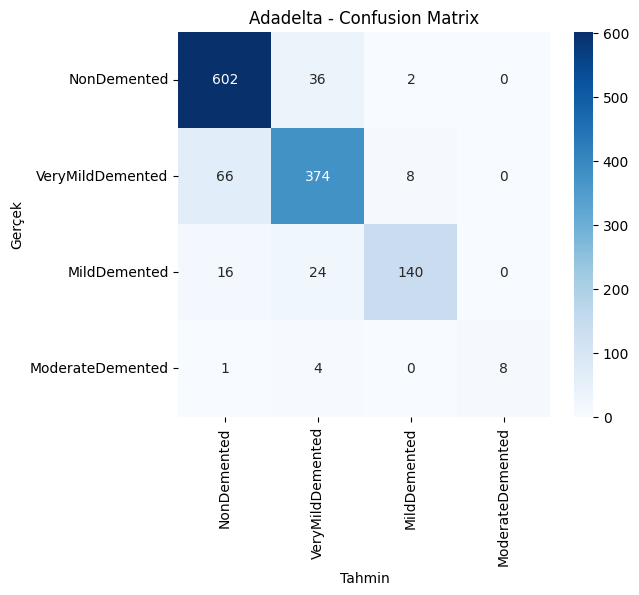

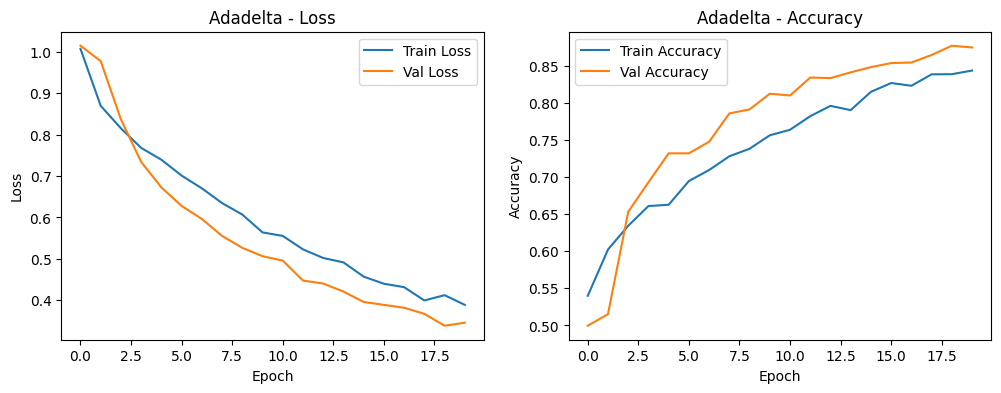


🔁 Adagrad ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.4751 - loss: 1.1172 - val_accuracy: 0.4996 - val_loss: 1.0650 - learning_rate: 0.0100
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.5555 - loss: 0.9473 - val_accuracy: 0.5168 - val_loss: 0.9715 - learning_rate: 0.0100
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.5918 - loss: 0.8833 - val_accuracy: 0.6167 - val_loss: 0.8806 - learning_rate: 0.0100
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.6456 - loss: 0.8219 - val_accuracy: 0.6659 - val_loss: 0.8011 - learning_rate: 0.0100
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.6339 - loss: 0.7978 - val_accuracy: 0.6940 - val_loss: 0.7541 - learning_rate: 0.0100
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.6370 - loss: 0.8008 - val_accuracy: 0.6924 - val_loss: 0.7349 - learning_rate: 0.0100
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 283s 2s

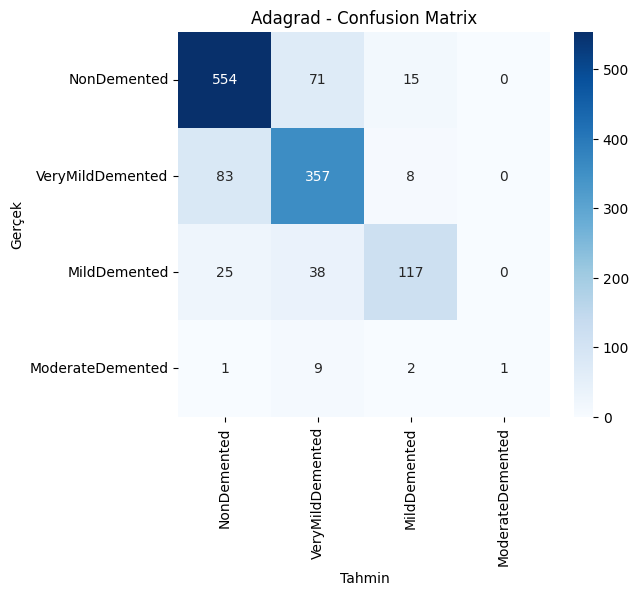

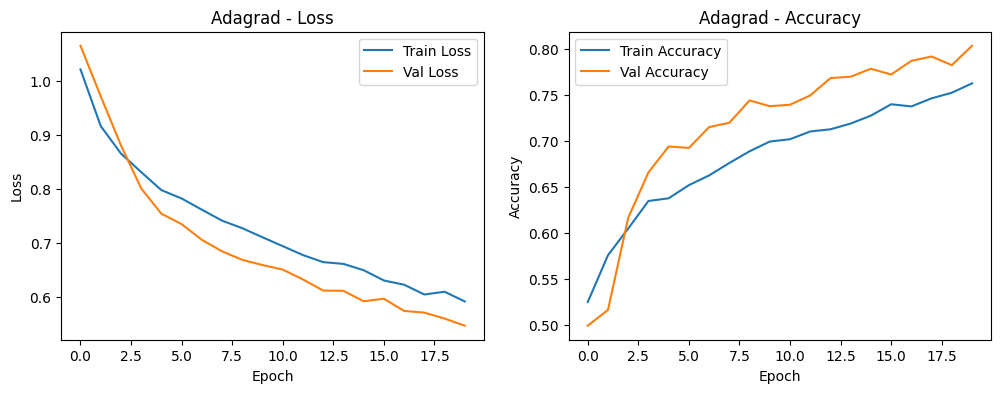

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\n🔁 {optimizer_name} ile eğitim başlıyor...\n")
    model = build_model(optimizer, dropout_rate=0.5)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    valid_label_names = [k for k, v in label_map.items() if v in sorted(set(y_true))]

    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True)

    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")

    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Tahmin')
    plt.ylabel('Gerçek')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

    # Loss ve Accuracy grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{optimizer_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{optimizer_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Final Sonuçlar
for optimizer_name, result in results.items():
    print(f"\n📌 {optimizer_name} - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Recall Score: {result['recall_score']:.4f}")


📌 Adam - Final Results
Test Accuracy: 0.8970
F1 Score: 0.8970
Recall Score: 0.8970

📌 SGD - Final Results
Test Accuracy: 0.8509
F1 Score: 0.8509
Recall Score: 0.8509

📌 Nadam - Final Results
Test Accuracy: 0.9165
F1 Score: 0.9164
Recall Score: 0.9165

📌 RMSprop - Final Results
Test Accuracy: 0.8845
F1 Score: 0.8837
Recall Score: 0.8845

📌 Adadelta - Final Results
Test Accuracy: 0.8774
F1 Score: 0.8762
Recall Score: 0.8774

📌 Adagrad - Final Results
Test Accuracy: 0.8033
F1 Score: 0.7989
Recall Score: 0.8033


## Inception V3

Inception V3 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarının başarımları

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix


In [ ]:
# Veri yolu ve boyutlar
dataset_path = r"data/Original20SplitDataset"
img_size = 224

# Etiket haritası
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata oluştu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eğitim ve test verisi
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

In [ ]:
# InceptionV3 modeli
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model fonksiyonu
def build_model(optimizer, dropout_rate=0.5):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Optimizasyonlar
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}
# Model özetini göster
base_model.summary()

results = {}

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)


🔁 Adam ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.4825 - loss: 1.7056 - val_accuracy: 0.6190 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6189 - loss: 0.8930 - val_accuracy: 0.6596 - val_loss: 0.7395 - learning_rate: 0.0010
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.7103 - loss: 0.6767 - val_accuracy: 0.6823 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7392 - loss: 0.6127 - val_accuracy: 0.7400 - val_loss: 0.6220 - learning_rate: 0.0010
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7589 - loss: 0.5622 - val_accuracy: 0.7338 - val_loss: 0.6163 - learning_rate: 0.0010
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7865 - loss: 0.5070 - val_accuracy: 0.7564 - val_loss: 0.5883 - learning_rate: 0.0010
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/st

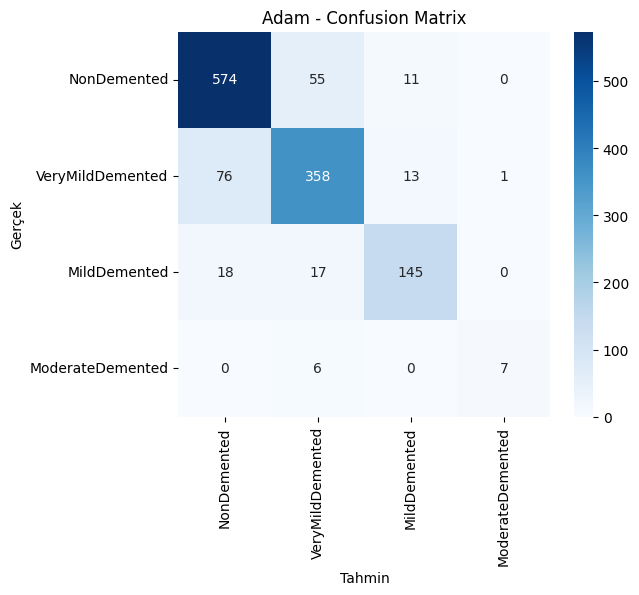

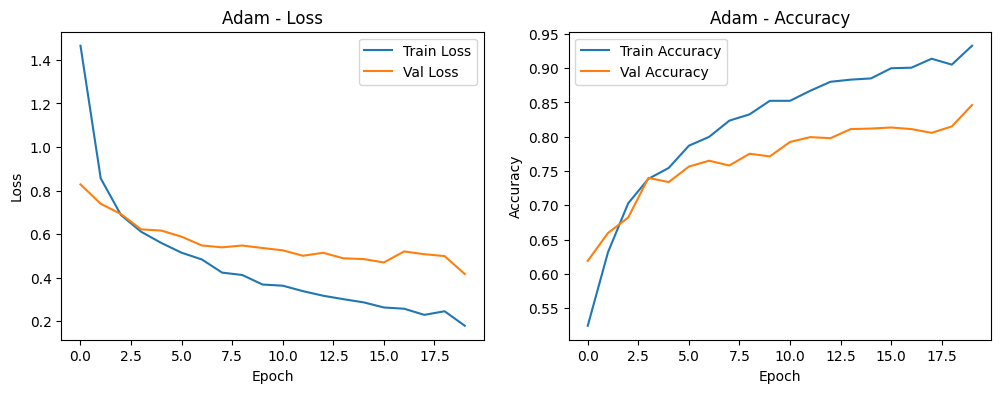


🔁 SGD ile eğitim başlıyor...

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.4657 - loss: 1.4947 - val_accuracy: 0.5222 - val_loss: 0.9621 - learning_rate: 0.0100
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.5548 - loss: 1.0479

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\n🔁 {optimizer_name} ile eğitim başlıyor...\n")
    model = build_model(optimizer, dropout_rate=0.5)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    valid_label_names = [k for k, v in label_map.items() if v in sorted(set(y_true))]

    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True)

    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")

    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Tahmin')
    plt.ylabel('Gerçek')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

    # Loss ve Accuracy grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{optimizer_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{optimizer_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Final Sonuçlar
for optimizer_name, result in results.items():
    print(f"\n📌 {optimizer_name} - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Recall Score: {result['recall_score']:.4f}")

## Densenet

# Model Değerlendirmeleri

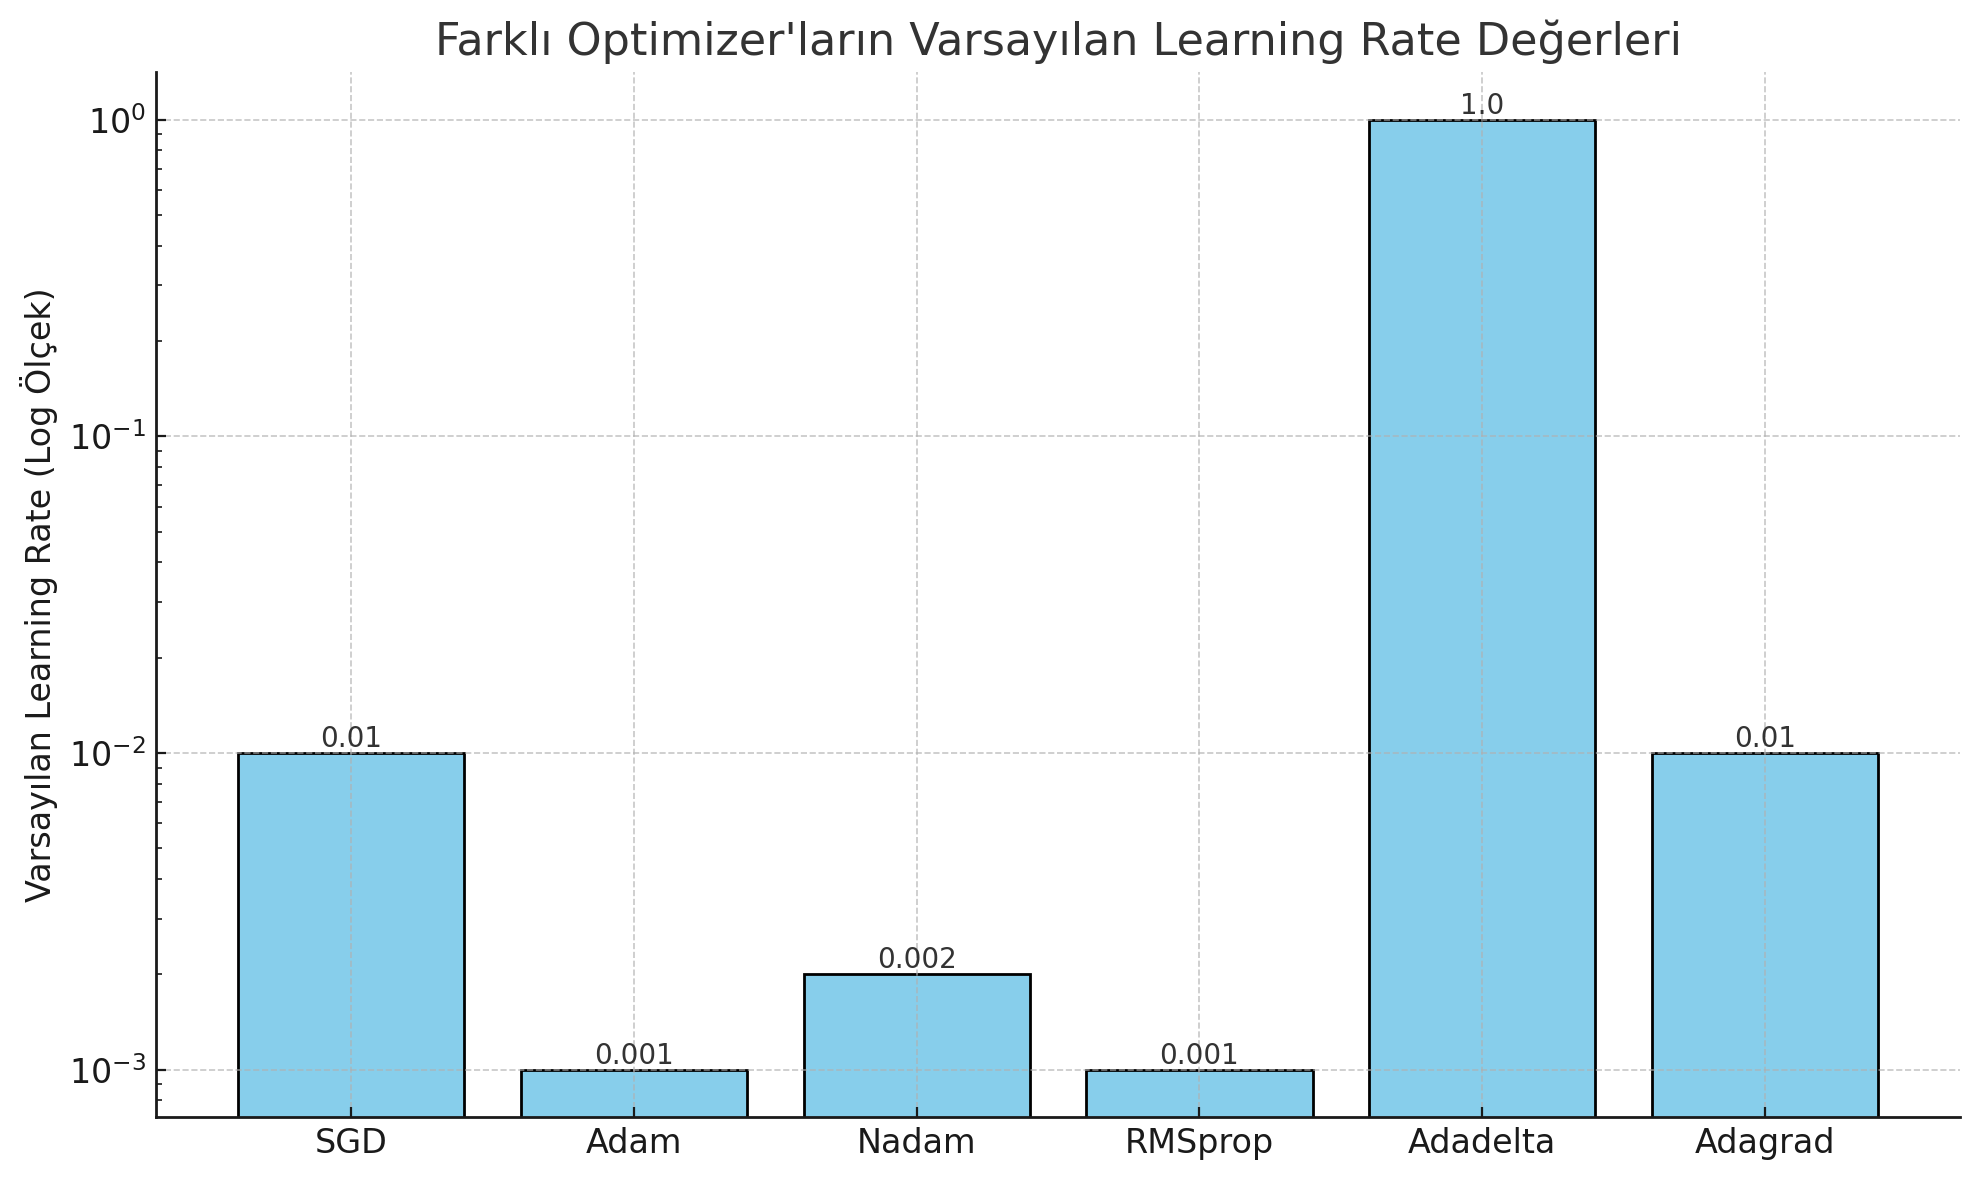

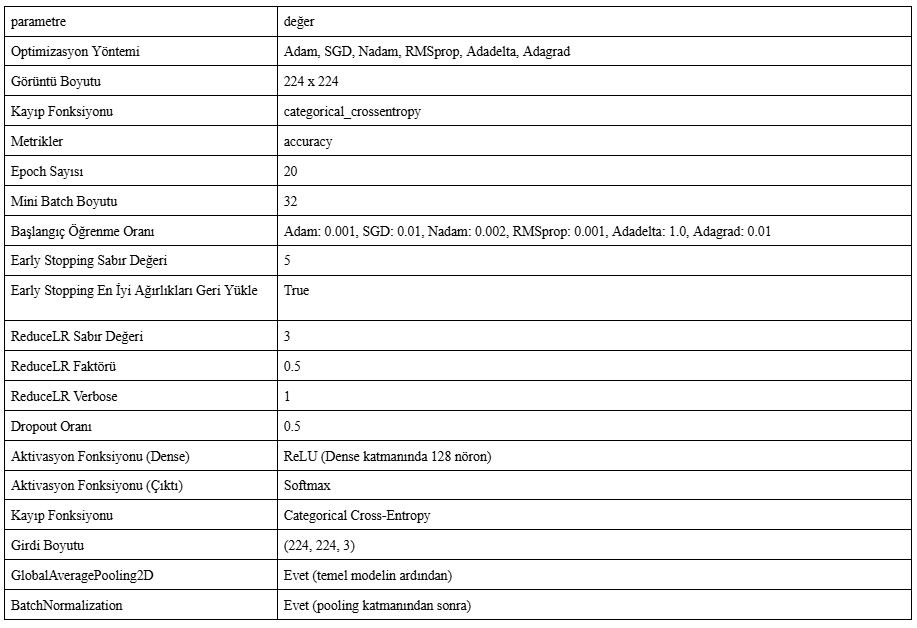

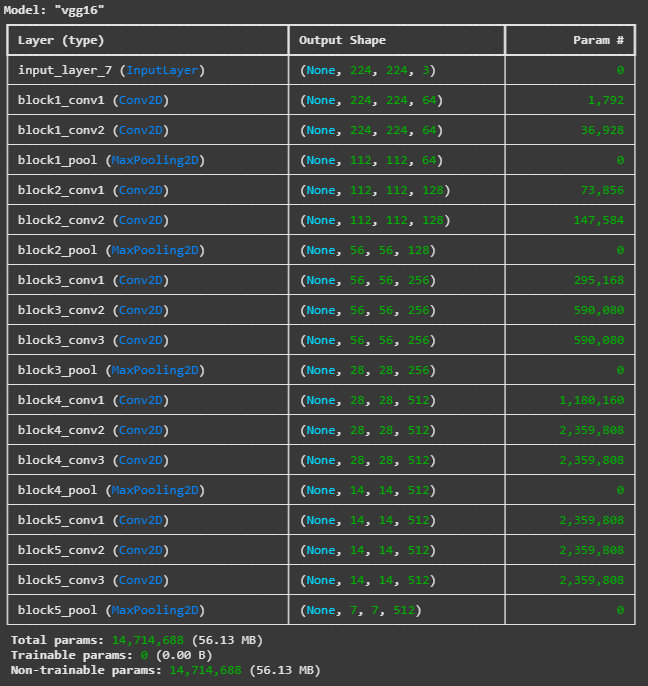

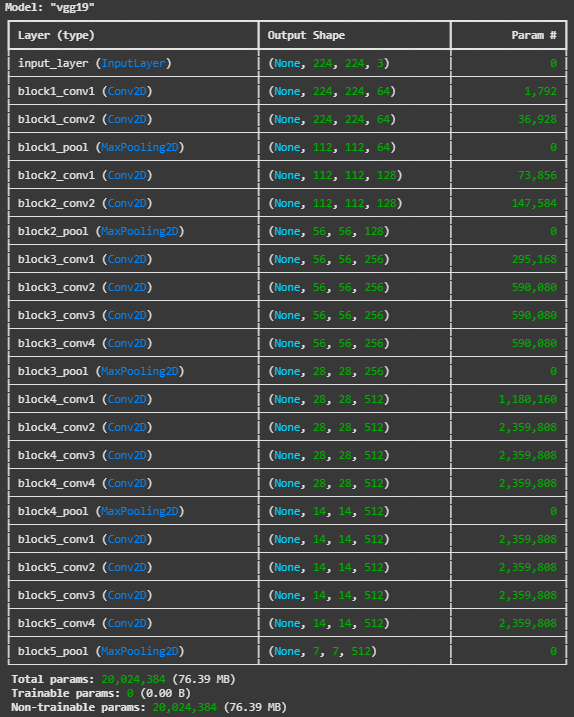

# Projeyi Githuba Yükleme

In [6]:
!git config --global user.email "21060631@stu.omu.edu.tr"
!git config --global user.name "aysenuressiz"

In [7]:
!git clone https://github.com/aysenuressiz/alzheimer-detection.git

Cloning into 'alzheimer-detection'...
fatal: could not read Username for 'https://github.com': No such device or address


In [8]:
!cp "bitirme.ipynb" "alzheimer-detection/"

cp: cannot stat 'bitirme.ipynb': No such file or directory


In [9]:
%cd alzheimer-detection

[Errno 2] No such file or directory: 'alzheimer-detection'
/content


In [4]:
!git add .
!git commit -m "bitirme projesi notebook eklendi"
!git push

[Errno 2] No such file or directory: 'alzheimer-detection'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
